In [1]:
%cd ..

/home/dawood/Workspace/pose-estimation


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import cv2
import numpy as np

from utils.eval import hm2kpts

In [3]:
import torch
from models.openpose import Openpose

model = Openpose()
model.load_state_dict(torch.load('/home/dawood/Experiments/HM+JM_Openpose_2/model_last.weights'))
model = model.eval()
model = model.cuda()

In [4]:
from data.coco import COCO
data = COCO('/home/dawood/Datasets/MSCOCO/val2017/', '/home/dawood/Datasets/MSCOCO/annotations/person_keypoints_val2017.json', augment=False, sigma=1)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


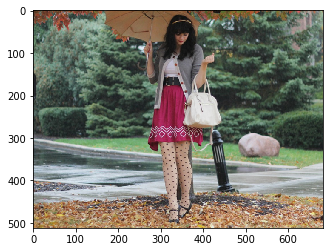

In [5]:
img, hm_gt, jm_gt, mask, i = data[10]

hm_pred, jm_pred = model(data.normalize(img.clone()).unsqueeze(0).cuda())[-1]
hm_pred, jm_pred = hm_pred[0], jm_pred[0]

sy = img.shape[1] / hm_pred.shape[1]
sx = img.shape[2] / hm_pred.shape[2]

disp_img = img.permute(1,2,0).contiguous().numpy()
plt.figure()
plt.imshow(disp_img)
plt.show()

In [15]:
%time anns = hm2kpts(hm_pred.detach().cpu().numpy(), jm_pred.detach().cpu().numpy(), 0, hm_threshold=0.1, jm_threshold=0.05, scale=(sx, sy), sigma=1)
anns

HM 0
HM 1
HM 2
HM 3
HM 4
HM 5
HM 6
HM 7
HM 8
HM 9
HM 10
HM 11
HM 12
HM 13
HM 14
HM 15
HM 16
JM 0
JM 1
JM 2
JM 3
JM 4
JM 5
JM 6
JM 7
JM 8
JM 9
JM 10
JM 11
JM 12
JM 13
JM 14
JM 15
JM 16
JM 17
JM 18
CPU times: user 29 ms, sys: 7.43 ms, total: 36.5 ms
Wall time: 25.1 ms


[{'category_id': 1,
  'image_id': 0,
  'keypoints': [345,
   64,
   2,
   353,
   56,
   2,
   336,
   56,
   2,
   361,
   56,
   2,
   328,
   56,
   2,
   377,
   96,
   2,
   304,
   96,
   2,
   385,
   176,
   2,
   280,
   160,
   2,
   401,
   128,
   2,
   272,
   104,
   2,
   353,
   232,
   2,
   312,
   224,
   2,
   353,
   336,
   2,
   320,
   344,
   2,
   353,
   448,
   2,
   328,
   464,
   2],
  'score': 1}]

In [9]:
disp_img = img.permute(1,2,0).contiguous().numpy()
for ann in anns:
    kpts = np.array(ann['keypoints']).reshape(-1, 3)
    for x, y, _ in kpts:
        print(x, y)
        plt.figure()
        cv2.circle(disp_img, (x, y), 5, (0, 1, 0), -1, cv2.LINE_AA)
        plt.imshow(disp_img)
        break
plt.show()

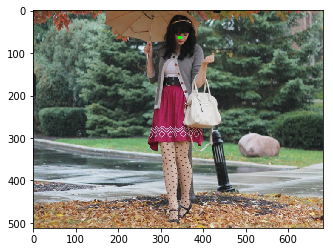

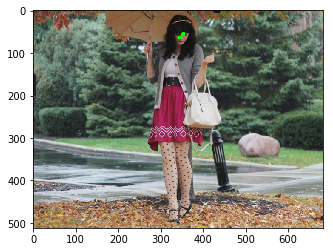

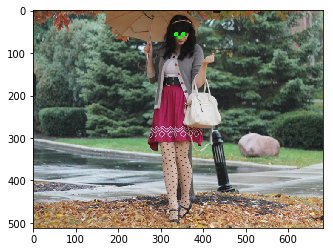

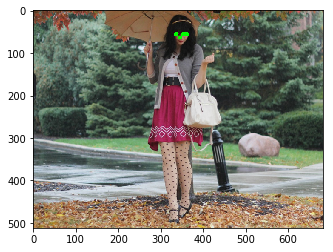

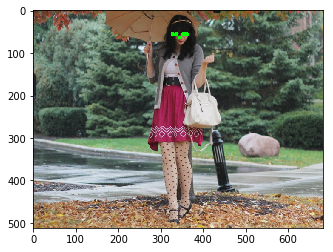

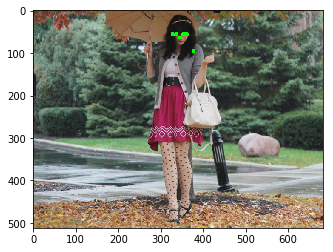

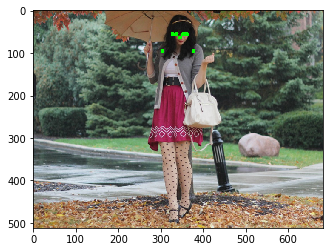

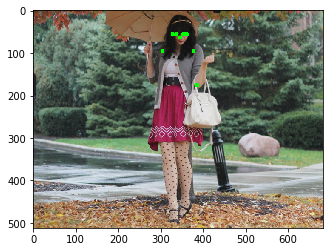

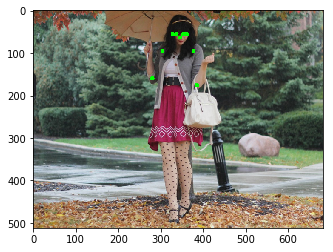

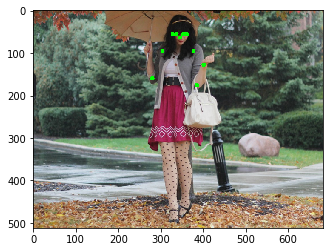

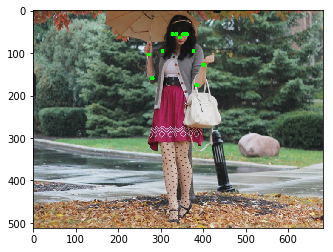

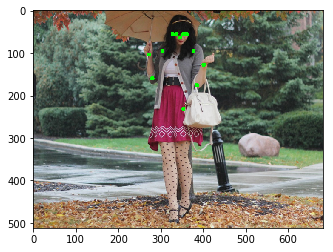

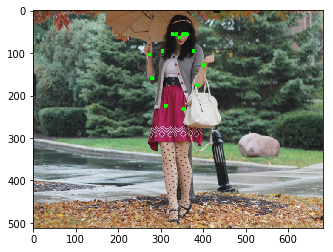

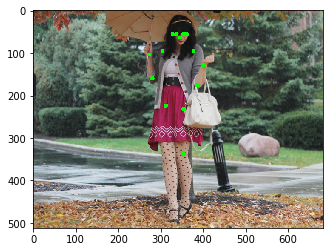

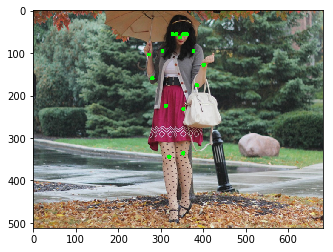

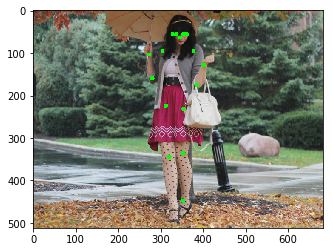

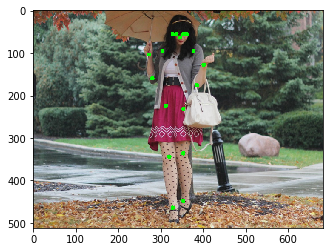

In [25]:
disp_img = img.permute(1,2,0).contiguous().numpy()
for ann in anns:
    kpts = np.array(ann['keypoints']).reshape(-1, 3)
    for x, y, _ in kpts:
        plt.figure()
        cv2.circle(disp_img, (x, y), 5, (0, 1, 0), -1, cv2.LINE_AA)
        plt.imshow(disp_img)
        
plt.show()

In [8]:
print(img.shape,hm_pred.shape)

torch.Size([3, 512, 682]) torch.Size([18, 64, 85])


In [9]:
682 / 85

8.023529411764706